In [1]:
import keras

from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
import numpy as np


Using TensorFlow backend.


In [2]:

model = VGG19(weights='imagenet', include_top=False)
model.summary()

img_path = './dataset/0001.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

inceptionv3_feature = model.predict(img_data)
print(inceptionv3_feature.shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [3]:
def get_feature_from_NN(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    features = model.predict(img_data)
    return features

In [4]:
# import the necessary packages
import numpy as np
import csv

class Searcher:
    def __init__(self, indexPath):
        # store our index path
        self.indexPath = indexPath

    def search(self, queryFeatures, limit = 50):
        # initialize our dictionary of results
        results = {}

        # open the index file for reading
        with open(self.indexPath) as f:
            # initialize the CSV reader
            reader = csv.reader(f)

            # loop over the rows in the index
            for row in reader:
                # parse out the image ID and features, then compute the
                # chi-squared distance between the features in our index
                # and our query features
                features = [float(x) for x in row[1:]]
                d = self.chi2_distance(features, queryFeatures)

                # now that we have the distance between the two feature
                # vectors, we can udpate the results dictionary -- the
                # key is the current image ID in the index and the
                # value is the distance we just computed, representing
                # how 'similar' the image in the index is to our query
                results[row[0]] = d

            # close the reader
            f.close()

        # sort our results, so that the smaller distances (i.e. the
        # more relevant images are at the front of the list)
        results = sorted([(v, k) for (k, v) in results.items()])

        # return our (limited) results
        return results[:limit]

    def chi2_distance(self, histA, histB, eps = 1e-10):
        # compute the chi-squared distance
        d = 0.5 * np.sum([((a - b) ** 2) / (a + b + eps)
            for (a, b) in zip(histA, histB)])
        return d
    def cosine_distance(training_set_vectors, query_vector, top_n=50):
        '''
        Calculates cosine distances between query image (vector) and all training set images (vectors).

        :param training_set_vectors: numpy Matrix, vectors for all images in the training set
        :param query_vector: numpy vector, query image (new image) vector
        :param top_n: integer, number of closest images to return
        '''

        distances = []

        for i in range(len(training_set_vectors)): #For Cifar 10 -> 50k images
            distances.append(cosine(training_set_vectors[i], query_vector[0]))

        return np.argsort(distances)[:top_n]
    def hamming_distance(training_set_vectors, query_vector, top_n=50):
        '''
        Calculates hamming distances between query image (vector) and all training set images (vectors).

        :param training_set_vectors: numpy Matrix, vectors for all images in the training set
        :param query_vector: numpy vector, query image (new image) vector
        :param top_n: Integer, number of closest images to return
        '''

        distances = []

        for i in range(len(training_set_vectors)): #For Cifar 10 -> 50k images
            distances.append(hamming(training_set_vectors[i], query_vector[0]))

        return np.argsort(distances)[:top_n]
        # return the chi-squared distance


In [34]:
import glob

# open the output index file for writing
output = open('index_nn.csv', "w")

# use glob to grab the image paths and loop over them
for ext in ('*.gif', '*.png', '*.jpg','*.jpeg'):
    for imagePath in glob.glob('./dataset/' + ext):
        # extract the image ID (i.e. the unique filename) from the image
        # path and load the image itself
        imageID = imagePath[imagePath.rfind("/") + 1:]
        #image = cv2.imread(imagePath)
        features_nn=get_feature_from_NN(img_path)
        #print(inceptionv3_feature.shape)

        # write the features to file
        features = features_nn[0].reshape(1,7*7*512)
        features = [str(f) for f in features.tolist()]
        output.write("%s,%s\n" % (imageID, ",".join(features)))
print("finish populating features per image")
# close the index file
output.close()

finish populating features per image


In [5]:
template_features= get_feature_from_NN('./queries/microsoftlogo.png')
# perform the search
searcher = Searcher('index_nn.csv')
results = searcher.search(template_features)

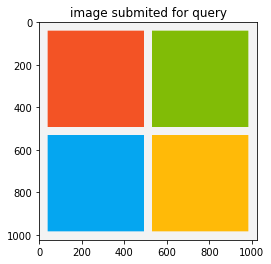

----------------------------------------------------------------------------------------------------
67079.0390625 dataset\0000.jpg


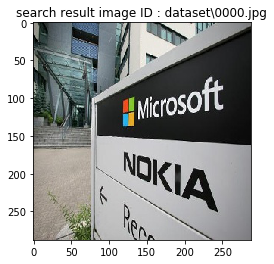

67079.0390625 dataset\0001.jpg


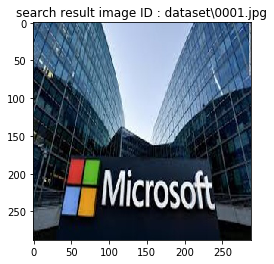

67079.0390625 dataset\0002.jpg


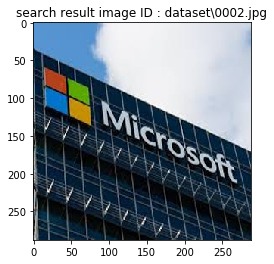

67079.0390625 dataset\0003.jpg


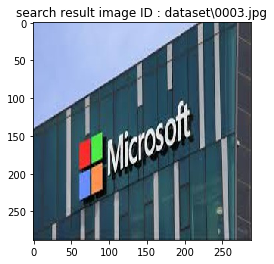

67079.0390625 dataset\0004.jpg


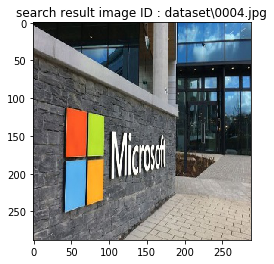

67079.0390625 dataset\0005.jpg


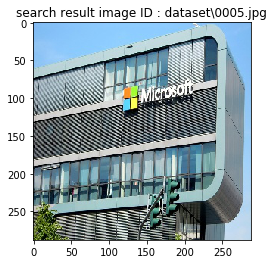

67079.0390625 dataset\0006.jpg


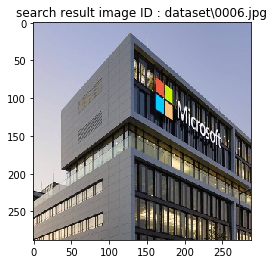

67079.0390625 dataset\0007.jpg


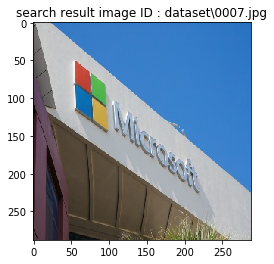

67079.0390625 dataset\0008.jpg


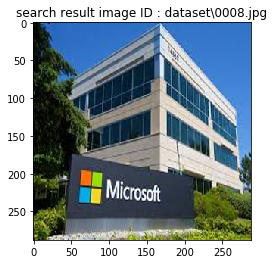

67079.0390625 dataset\0009.jpg


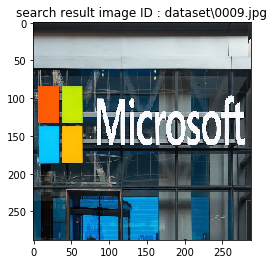

67079.0390625 dataset\0010.jpg


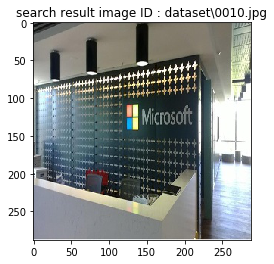

67079.0390625 dataset\0011.jpg


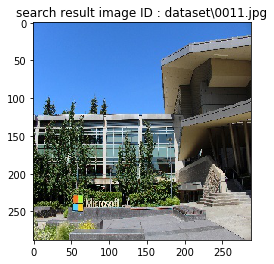

67079.0390625 dataset\0012.jpg


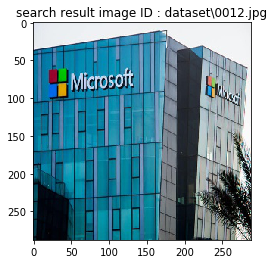

67079.0390625 dataset\0013.jpg


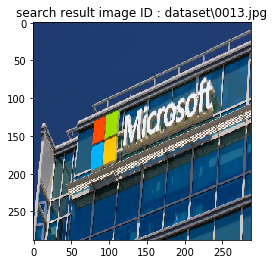

67079.0390625 dataset\0014.jpg


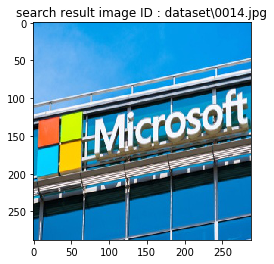

67079.0390625 dataset\0015.jpg


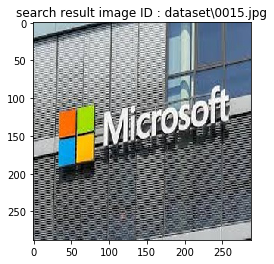

67079.0390625 dataset\0016.jpg


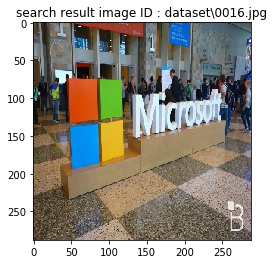

67079.0390625 dataset\0017.jpg


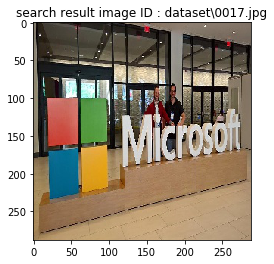

67079.0390625 dataset\0018.jpg


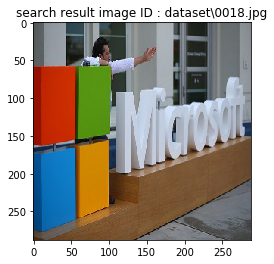

67079.0390625 dataset\0019.jpg


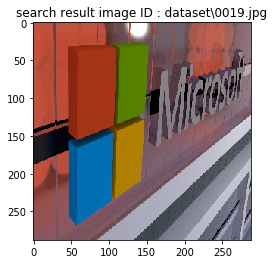

67079.0390625 dataset\0020.jpg


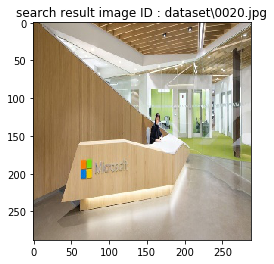

67079.0390625 dataset\0021.jpg


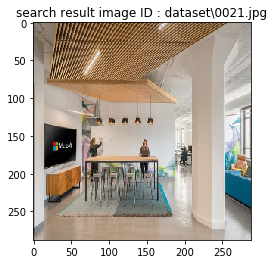

67079.0390625 dataset\0022.jpg


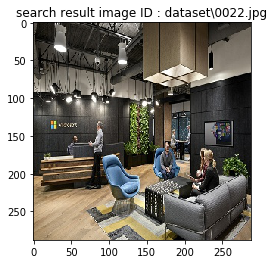

67079.0390625 dataset\0023.jpg


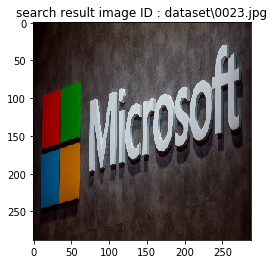

67079.0390625 dataset\0024.jpg


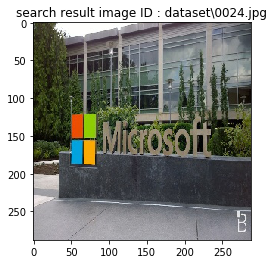

67079.0390625 dataset\0025.jpg


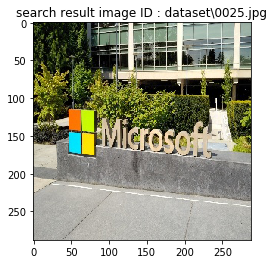

67079.0390625 dataset\0026.jpeg


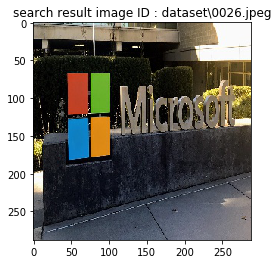

67079.0390625 dataset\0027.jpg


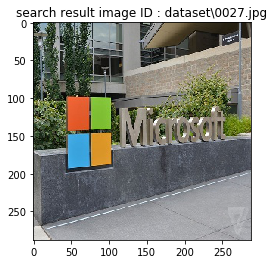

67079.0390625 dataset\0028.jpg


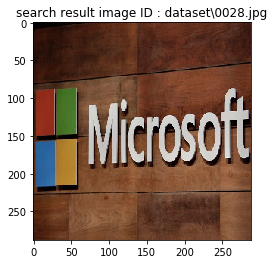

67079.0390625 dataset\0029.jpg


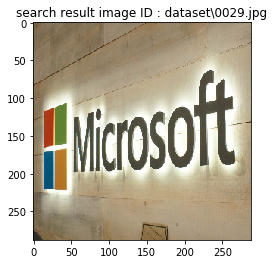

67079.0390625 dataset\0030.jpg


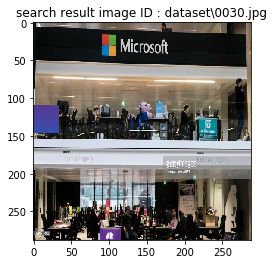

67079.0390625 dataset\0031.jpg


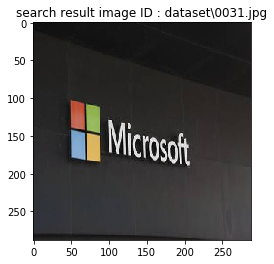

67079.0390625 dataset\0032.jpg


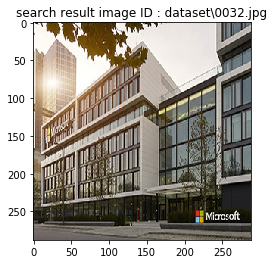

67079.0390625 dataset\0033.jpg


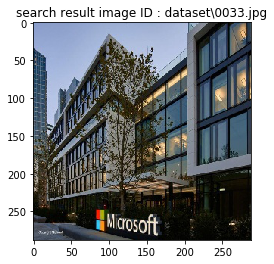

67079.0390625 dataset\0034.jpg


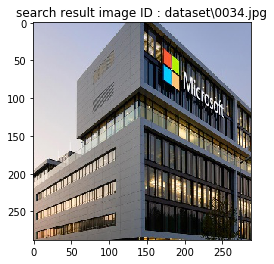

67079.0390625 dataset\0035.jpg


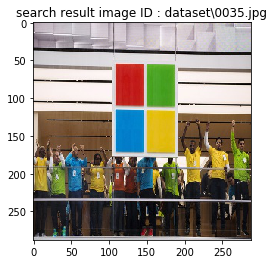

67079.0390625 dataset\0036.jpg


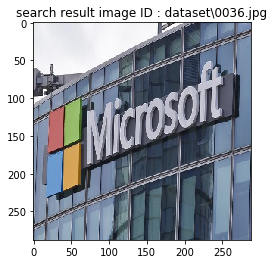

67079.0390625 dataset\0037.jpg


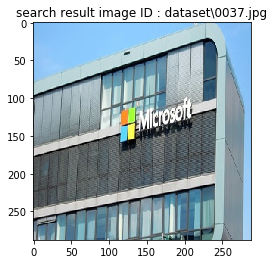

67079.0390625 dataset\0038.jpg


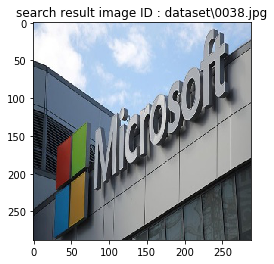

67079.0390625 dataset\0039.jpg


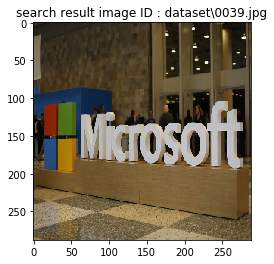

67079.0390625 dataset\0040.jpg


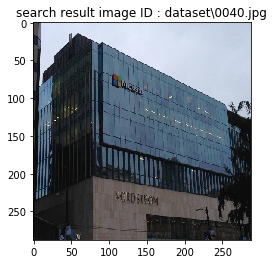

67079.0390625 dataset\0041.jpg


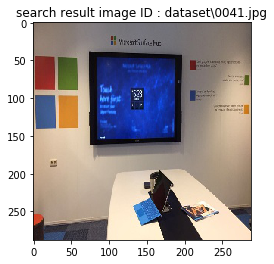

67079.0390625 dataset\0042.jpg


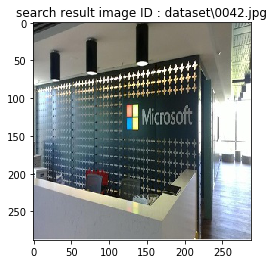

67079.0390625 dataset\0043.jpg


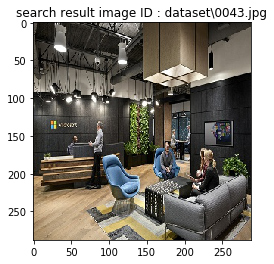

67079.0390625 dataset\0044.jpg


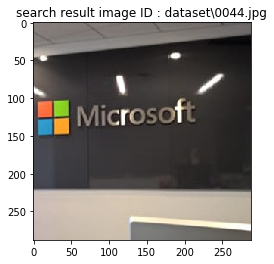

67079.0390625 dataset\0045.png


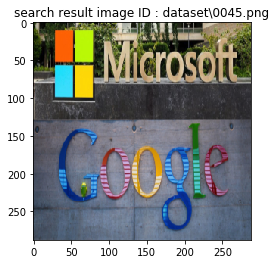

67079.0390625 dataset\0046.jpg


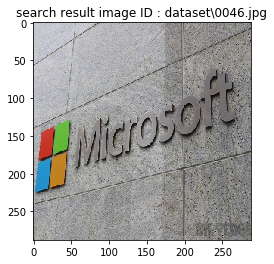

67079.0390625 dataset\0047.jpg


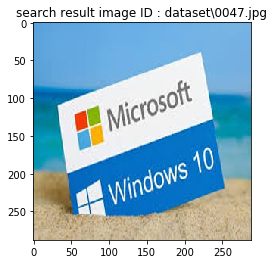

67079.0390625 dataset\0048.jpg


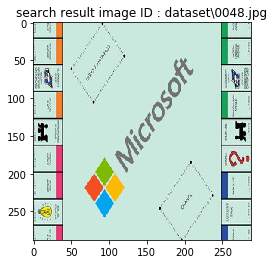

67079.0390625 dataset\0049.jpg


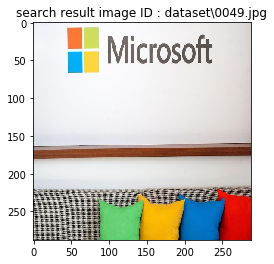

In [6]:
import matplotlib.pyplot as plt
# display the query
im_template=plt.imread('./queries/microsoftlogo.png')
plt.imshow(im_template)
plt.title("image submited for query")
plt.show()
print("----"*25)
resultimgs=[]
# loop over the results
for (score, resultID) in results:
    # load the result image and display it
    print(score,resultID)
    #result = cv2.imread(args["result_path"] + "/" + resultID)
    result=plt.imread(resultID.replace('\\','/'))
    resultimgs.append(result)
    plt.imshow(result)
    
    plt.title("search result image ID : "+resultID)
    plt.show()